# Driver Laptimes Distribution Visualization
Visualizae different drivers' laptime distributions.


In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
fastf1.Cache.enable_cache('cache')
# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

Load the race session



In [2]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
logger      WARNING 	Failed to load schedule from F1 API backend!
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.1.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            IN

Get all the laps for the point finishers only.
Filter out slow laps (yellow flag, VSC, pitstops etc.)
as they distort the graph axis.



In [3]:
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['11', '1', '16', '14', '55', '44', '18', '63', '4', '22']


To plot the drivers by finishing order,
we need to get their three-letter abbreviations in the finishing order.



In [4]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['PER', 'VER', 'LEC', 'ALO', 'SAI', 'HAM', 'STR', 'RUS', 'NOR', 'TSU']


We need to modify the DRIVER_COLORS palette.
Its keys are the driver's full names but we need the keys to be the drivers'
three-letter abbreviations.
We can do this with the DRIVER_TRANSLATE mapping.



In [5]:
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#0600ef', 'PER': '#716de2', 'PIA': '#ff8700', 'NOR': '#eeb370', 'GAS': '#0090ff', 'OCO': '#70c2ff', 'BOT': '#900000', 'ZHO': '#500000', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'MAG': '#ffffff', 'HUL': '#cacaca', 'ALO': '#006f62', 'STR': '#25a617', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'ALB': '#005aff', 'SAR': '#012564'}


First create the violin plots to show the distributions.
Then use the swarm plot to show the actual laptimes.



C:\Users\aryam\AppData\Local\Temp\ipykernel_11112\860106446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=driver_laps,
C:\Users\aryam\AppData\Local\Temp\ipykernel_11112\860106446.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(data=driver_laps,
c:\Users\aryam\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

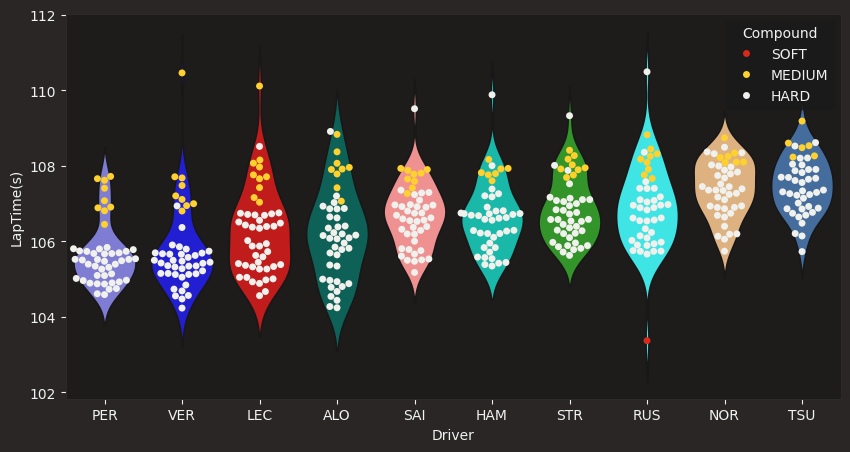

In [6]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

Make the plot more aesthetic



In [7]:
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2023 Azerbaijan Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>